# Zestaw zadań: Kwadratury adaptacyjne
## Zadanie 1,2
### Autor: Artur Gęsiarz

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec

### Funkcja podcalkowa dla zadania 1

In [285]:
def f1(x):
    return 4 / (1 + x ** 2)

### Funkcje podcalkowe dla zadania 2

In [286]:
def f2(x):
    return np.sqrt(x) * np.log(x) if x > 0 else 0

In [287]:
def f3(x, a = 0.001, b = 0.004):
    return 1 / ((x - 0.3) ** 2 + a) + 1 / ((x - 0.9) ** 2 + b) - 6

### Zakres tolerancji

In [288]:
tolerances = np.logspace(0, -14, num=15)

### Przedzial calkowania

In [289]:
a = 0
b = 1

### Prawdziwa wartosc calek

In [290]:
exact_value_f1 = np.pi
exact_value_f2 = - 4 / 9
exact_value_f3 = 1 / np.sqrt(0.001) * (np.arctan((1 - 0.3) / np.sqrt(0.001)) + np.arctan(0.3 / np.sqrt(0.001))) + 1 / np.sqrt(0.004) * (
            np.arctan((1 - 0.9) / np.sqrt(0.004)) + np.arctan(0.9 / np.sqrt(0.004))) - 6

### Blad wzgledny dla obu metod

In [291]:
errors_trap_f1 = []
errors_gauss_kronrod_f1 = []

errors_trap_f2 = []
errors_gauss_kronrod_f2 = []

errors_trap_f3 = []
errors_gauss_kronrod_f3 = []

### Liczba ewaluacji obu metod

In [292]:
evals_trap_f1 = []
evals_gauss_kronrod_f1 = []

evals_trap_f2 = []
evals_gauss_kronrod_f2 = []

evals_trap_f3 = []
evals_gauss_kronrod_f3 = []

### Funkcja obliczajaca calke metoda trapezow z podana toleraancja

In [293]:
def adaptive_trapezoidal_integration(f, a, b, tol):
    integral, err, info = quad_vec(f, a, b, epsabs=tol,quadrature='trapezoid', full_output=True)
    return integral, info.neval

### Funkcja obliczajca calke metoda Gaussa-Kronroda z podana tolerancja

In [294]:
def adaptive_gauss_kronrod_integration(f, a, b, tol):
    integral, err, info = quad_vec(f, a, b, epsabs=tol, full_output=True)
    return integral, info.neval

### ?

In [295]:
def calculate_errors_and_evals(f, method, exact_value, a, b, erros, evals):

    for tol in tolerances:
        integrate, neval = method(f, a, b, tol)
        error = np.abs(integrate - exact_value) / exact_value

        erros.append(error)
        evals.append(neval)

    return erros, evals

### Przejscie po wszystkich toleranacjach i obliczenie bledu

In [296]:
### Metoda Trapezow

errors_trap_f1 ,evals_trap_f1 = calculate_errors_and_evals(f1, adaptive_trapezoidal_integration, exact_value_f1, a, b, errors_trap_f1, evals_trap_f1)

errors_trap_f2 ,evals_trap_f2 = calculate_errors_and_evals(f2, adaptive_trapezoidal_integration, exact_value_f2, a, b, errors_trap_f2, evals_trap_f2)

# errors_trap_f3 ,evals_trap_f3 = calculate_errors_and_evals(f3, adaptive_trapezoidal_integration, exact_value_f3, a, b, errors_trap_f3, evals_trap_f3)

### Metoda Gausaa-Kronroda

errors_gauss_kronrod_f1,evals_gauss_kronrod_f1 = calculate_errors_and_evals(f1, adaptive_gauss_kronrod_integration, exact_value_f1, a, b, errors_gauss_kronrod_f1, evals_gauss_kronrod_f1)

errors_gauss_kronrod_f2,evals_gauss_kronrod_f2 = calculate_errors_and_evals(f2, adaptive_gauss_kronrod_integration, exact_value_f2, a, b, errors_gauss_kronrod_f2, evals_gauss_kronrod_f2)

# errors_gauss_kronrod_f3,evals_gauss_kronrod_f3 = calculate_errors_and_evals(f3, adaptive_gauss_kronrod_integration, exact_value_f3, a, b, errors_gauss_kronrod_f3, evals_gauss_kronrod_f3)

In [297]:
print(errors_trap_f2 ,evals_trap_f2)

[-0.19426586767141565, -0.035153964750782765, -0.002845126682615551, -0.0002994570987095435, -2.8399258154121476e-05, -2.829729889533561e-06, -2.8142269901942907e-07, -2.8131832238709187e-08, -2.812811983332608e-09, -1.4727785241364089e-09, -1.4727785241364089e-09, -1.4727785241364089e-09, -1.4727785241364089e-09, -1.4727785241364089e-09, -1.4727785241364089e-09] [8, 18, 43, 118, 368, 1158, 3658, 11563, 36558, 50523, 50523, 50523, 50523, 50523, 50523]


### Rysowanie wykresu dla funkcji podcalkowej nr. 1

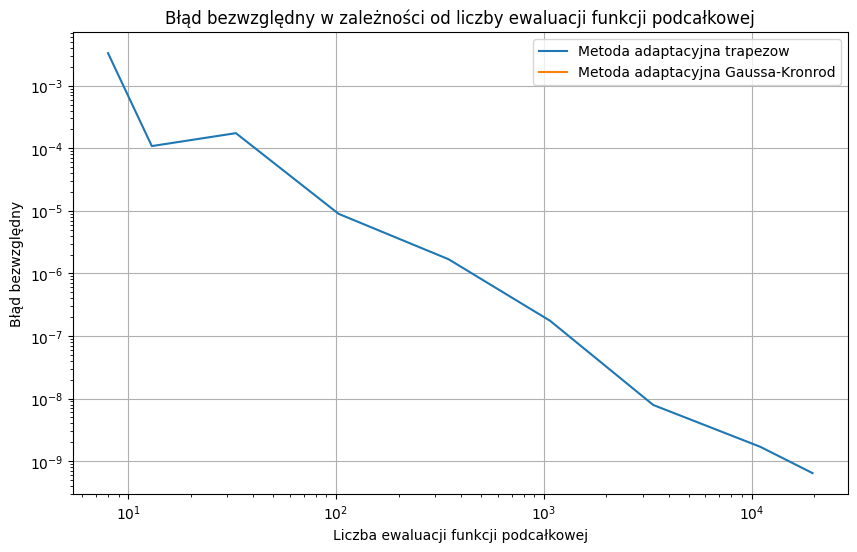

In [298]:
plt.figure(figsize=(10, 6))
plt.semilogy(evals_trap_f1, errors_trap_f1, label='Metoda adaptacyjna trapezow')
plt.semilogy(evals_gauss_kronrod_f1, errors_gauss_kronrod_f1, label='Metoda adaptacyjna Gaussa-Kronrod')
plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Rysowanie wykresu dla funkcji podcalkowej nr. 2

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_18431/884224047.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


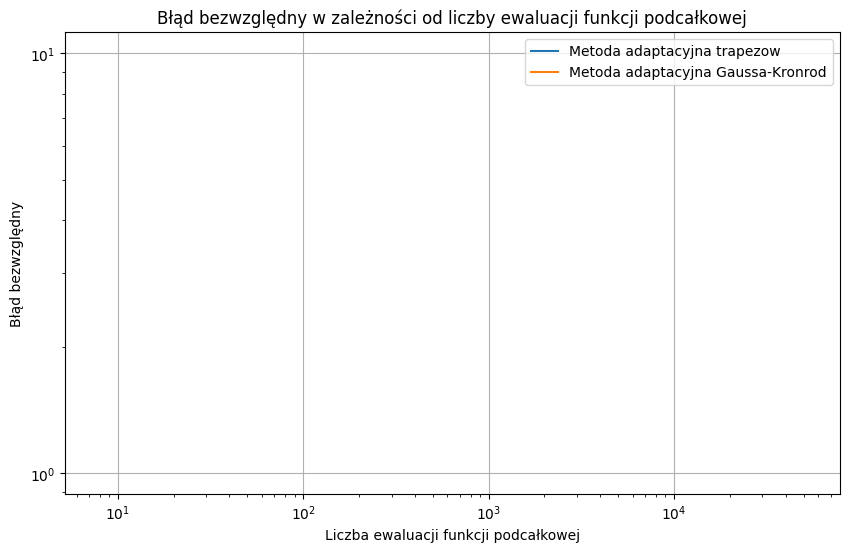

In [299]:
plt.figure(figsize=(10, 6))
plt.plot(evals_trap_f2, errors_trap_f2, label='Metoda adaptacyjna trapezow')
plt.plot(evals_gauss_kronrod_f2, errors_gauss_kronrod_f2, label='Metoda adaptacyjna Gaussa-Kronrod')
plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Rysowanie wykresu dla funkcji podcalkowej nr. 3

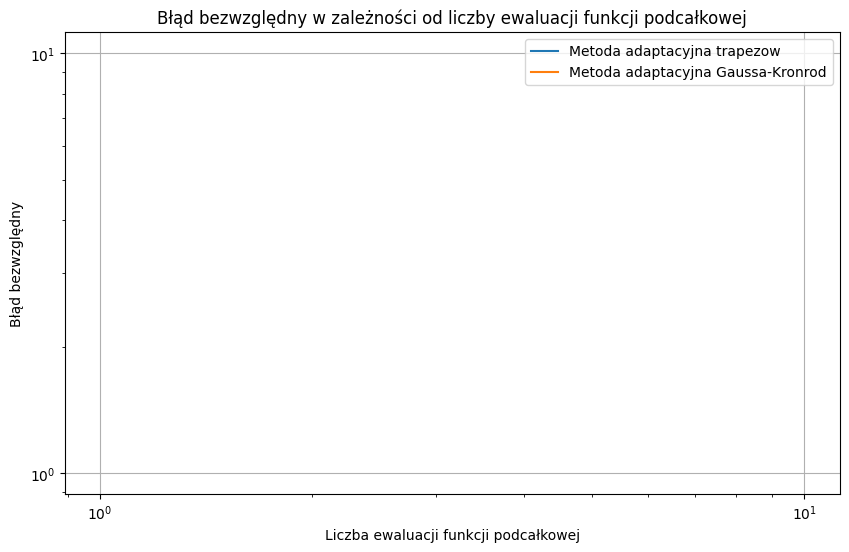

In [300]:
plt.figure(figsize=(10, 6))
plt.semilogy(evals_trap_f3, errors_trap_f3, label='Metoda adaptacyjna trapezow')
plt.semilogy(evals_gauss_kronrod_f3, errors_gauss_kronrod_f3, label='Metoda adaptacyjna Gaussa-Kronrod')
plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()